In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
# Chargement des données MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)
print('train_set:\t', x_train.shape) # 60,000 images
print("y_train :\t",y_train.shape)
print('test_set:\t', x_test.shape) # 10,000 images
print("y_test  :\t",y_test.shape)

train_set:	 (60000, 28, 28, 1)
y_train :	 (60000,)
test_set:	 (10000, 28, 28, 1)
y_test  :	 (10000,)


In [4]:
#on normalise les donneés
x_train = x_train / 255
x_test = x_test / 255

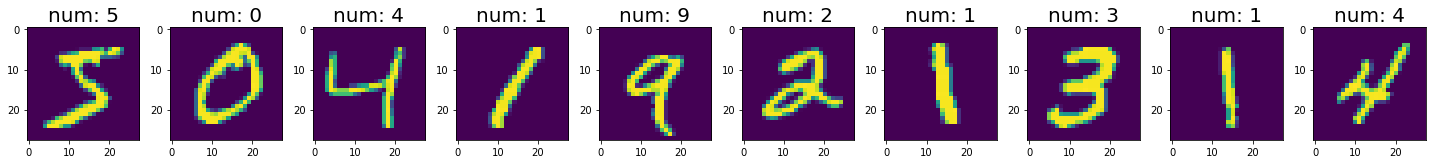

In [5]:
#Visualisation des données

plt.figure(figsize=(20,4))
for i in range (10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i])
    plt.title(f"num: {y_train[i]}",fontsize=20)
    
plt.tight_layout()
plt.show()

In [114]:
model=keras.Sequential([
    
    keras.layers.Input((28,28,1)),
    keras.layers.Conv2D(64, (3,3),  activation='relu'),
    keras.layers.Conv2D(128,(3,3),activation='relu'),#,strides=(1, 1), padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
    #la taille de l'images est (14,14,32)
    
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.Conv2D(128,(3,3),activation='relu'),#,strides=(1, 1), padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
    #la taille de l'images est (7,7,64)
    
    keras.layers.Flatten(), # Conversion des matrices 3D en vecteur 1D
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
    
])

In [115]:
model.summary()
#categorical_crossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 12, 12, 128)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 128)       147584    
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 128)         147584    
                                                      

In [7]:
!pip install scikeras

## trouver les meilleurs paramètres (EPOCH,BATCH_SIZE) de model

In [85]:
EPOCH = np.array([16,10])
BATCH_SIZE = np.array([1024,512])
hyperMatrix = dict(epochs=EPOCH, batch_size=BATCH_SIZE)

In [86]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
model_KerasClassifier = KerasClassifier(model=model,verbose=1,optimizer='adam',loss='sparse_categorical_crossentropy')
gs = GridSearchCV(estimator=model_KerasClassifier, param_grid=hyperMatrix )

# On lance l'entrainement
gs.fit(x_train, y_train)

INFO:tensorflow:Assets written to: ram://8d229cea-d03e-4f42-8537-5f877a6e8f41/assets
INFO:tensorflow:Assets written to: ram://3ce06251-f8dd-43dd-bf8d-064e5740335c/assets
Epoch 1/16
47/47 [==============================] - 5s 102ms/step - loss: 1.0266 - accuracy: 0.1394
Epoch 2/16
47/47 [==============================] - 5s 99ms/step - loss: 0.3472 - accuracy: 0.0989
Epoch 3/16
47/47 [==============================] - 5s 103ms/step - loss: 0.2493 - accuracy: 0.0988
Epoch 4/16
47/47 [==============================] - 5s 102ms/step - loss: 0.1995 - accuracy: 0.0989
Epoch 5/16
47/47 [==============================] - 5s 105ms/step - loss: 0.1707 - accuracy: 0.0986
Epoch 6/16
47/47 [==============================] - 5s 101ms/step - loss: 0.1469 - accuracy: 0.0989
Epoch 7/16
47/47 [==============================] - 5s 103ms/step - loss: 0.1340 - accuracy: 0.0991
Epoch 8/16
47/47 [==============================] - 5s 108ms/step - loss: 0.1230 - accuracy: 0.0986
Epoch 9/16
47/47 [=============

GridSearchCV(estimator=KerasClassifier(loss='sparse_categorical_crossentropy', model=<keras.engine.sequential.Sequential object at 0x7fa7d6c0e9d0>, optimizer='adam'),
             param_grid={'batch_size': array([1024,  512]),
                         'epochs': array([16, 10])})

In [87]:
print(f"Meilleur Paramétrer:\t{gs.best_params_}")
print(f"Meilleur Score:\t\t{gs.best_score_*100}%")

Meilleur Paramétrer:	{'batch_size': 512, 'epochs': 16}
Meilleur Score:		98.63333333333333%


## Évaluation du réseau de neurone sur les données de Test

In [116]:
batch_size = 512
epochs = 16
history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Epoch 1/16
118/118 [==============================] - 145s 1s/step - loss: 0.3217 - accuracy: 0.9020 - val_loss: 0.0562 - val_accuracy: 0.9830
Epoch 2/16
118/118 [==============================] - 134s 1s/step - loss: 0.0556 - accuracy: 0.9823 - val_loss: 0.0385 - val_accuracy: 0.9872
Epoch 3/16
118/118 [==============================] - 144s 1s/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0263 - val_accuracy: 0.9916
Epoch 4/16
118/118 [==============================] - 138s 1s/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.0226 - val_accuracy: 0.9930
Epoch 5/16
118/118 [==============================] - 139s 1s/step - loss: 0.0214 - accuracy: 0.9933 - val_loss: 0.0208 - val_accuracy: 0.9939
Epoch 6/16
118/118 [==============================] - 154s 1s/step - loss: 0.0173 - accuracy: 0.9948 - val_loss: 0.0224 - val_accuracy: 0.9936
Epoch 7/16
118/118 [==============================] - 140s 1s/step - loss: 0.0187 - accuracy: 0.9938 - val_loss: 0.0225 - val_accuracy: 0.9927

In [137]:
val_loss ,val_accuracy = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 7s 22ms/step - loss: 0.0233 - accuracy: 0.9944


In [138]:
print(f"val_loss est :\t\t{val_loss}")
print(f"val_accuracy est :\t{val_accuracy}")

val_loss est :		0.023264078423380852
val_accuracy est :	0.9944000244140625


## Courbes d'Entraînement et de validation (loss et accuracy)

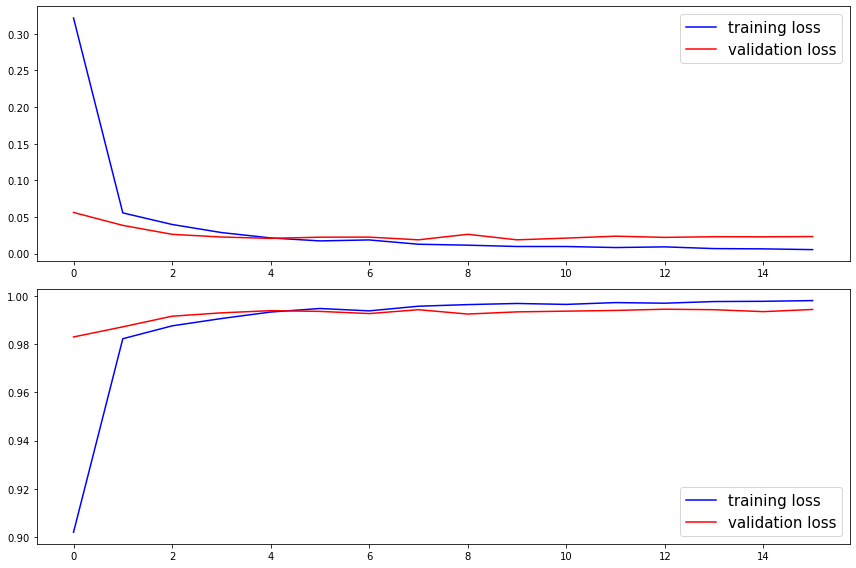

In [120]:
plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.plot(history.history['loss'],label="training loss",c='b')
plt.plot(history.history['val_loss'],label="validation loss",c='r')
plt.legend(fontsize=15)
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'],label="training accuracy",c='b')
plt.plot(history.history['val_accuracy'],label="validation accuracy",c='r')
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

## Confusion matrix

La matrice de confusion peut être très utile pour voir les inconvénients de votre modèle.

Je trace la matrice de confusion des résultats de validation.

In [125]:
y_pred = np.argmax(model.predict(x_test), axis=1)


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [126]:
print(y_pred[:10])
print(y_test[:10])

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


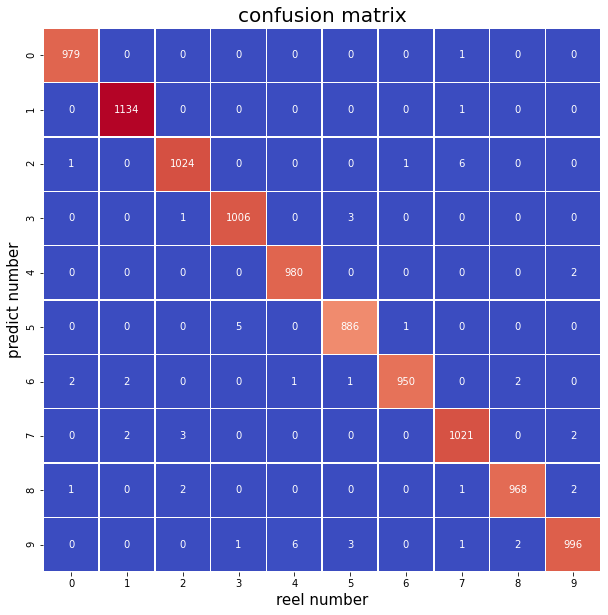

In [127]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm,cmap=sns.color_palette("coolwarm", as_cmap=True),fmt="d",
            annot=True,cbar=False,linewidths=.5)
plt.xlabel("reel number",fontsize=15)
plt.ylabel("predict number",fontsize=15)
plt.title("confusion matrix",fontsize=20)
plt.show()

## visualiser quelque prediction 

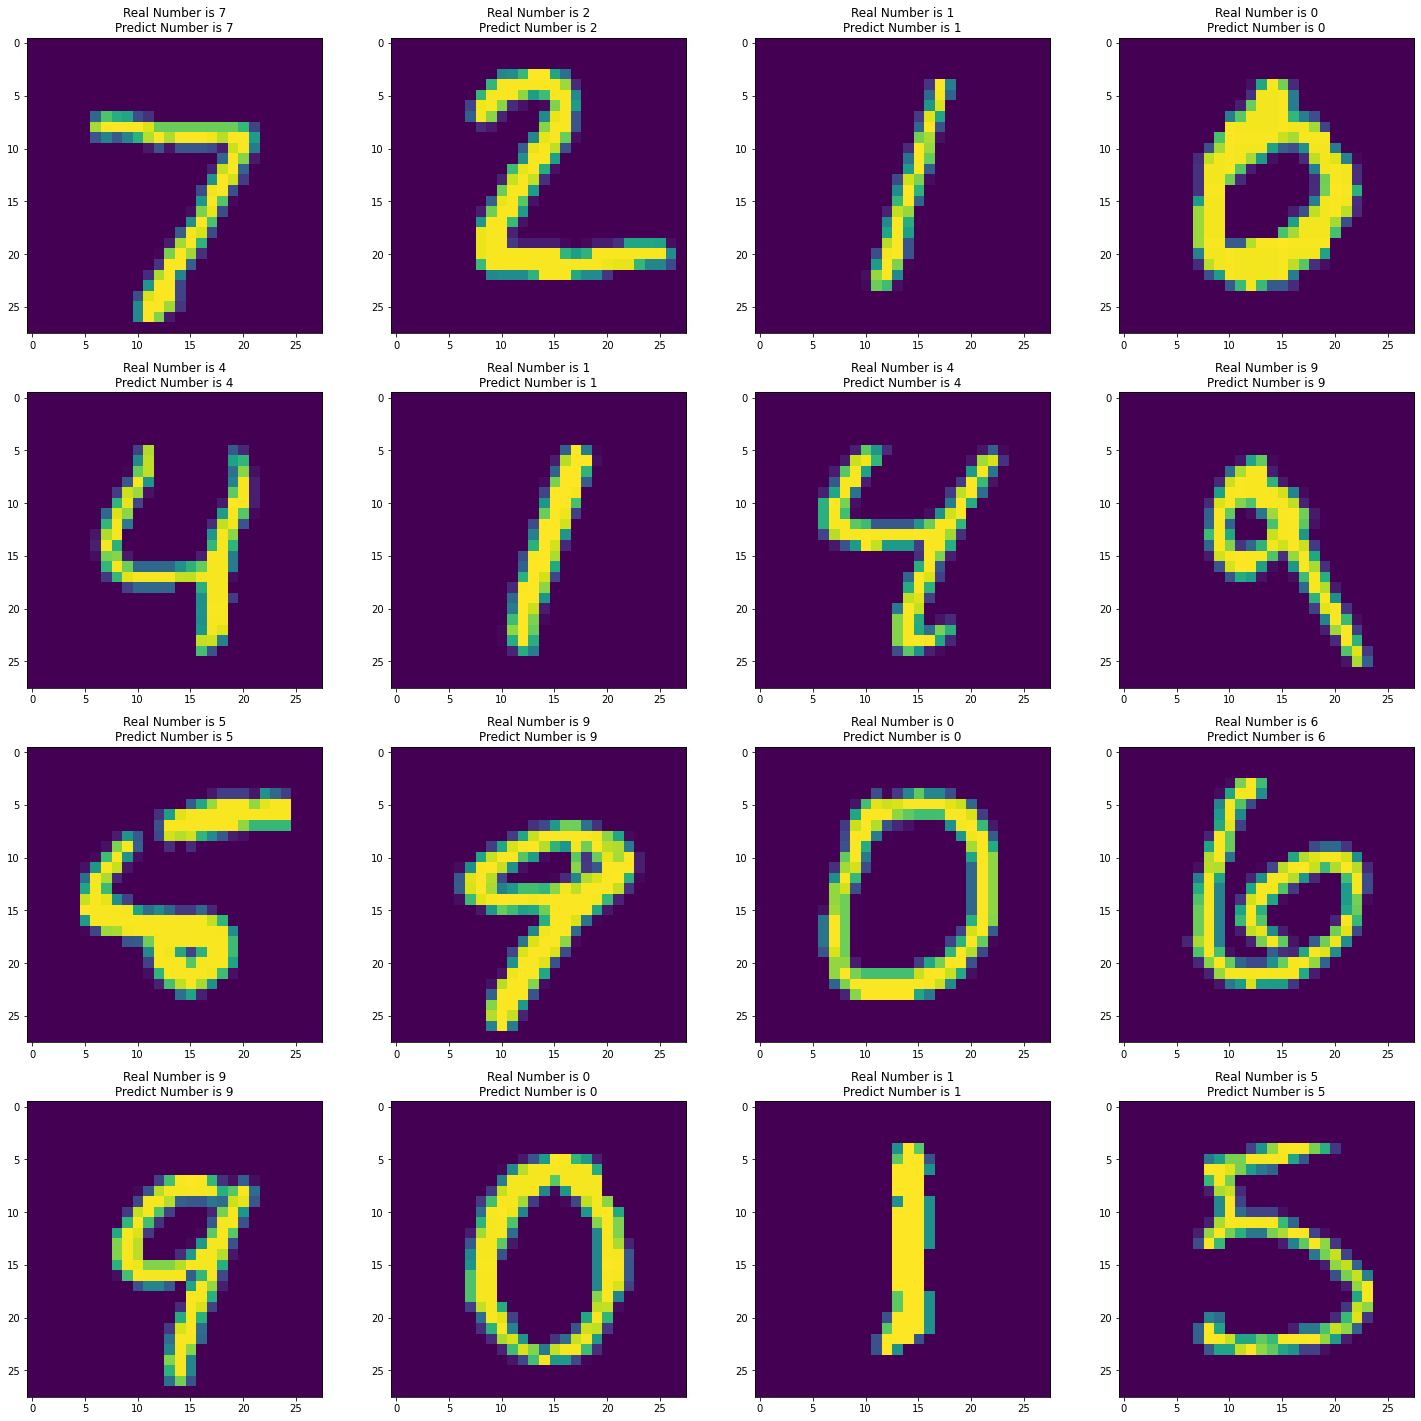

In [136]:
plt.figure(figsize=(25,25))

for i in range(16):
        plt.subplot(4,4,i+1,)
        plt.imshow(x_test[i])
        plt.title(f"Real Number is {y_test[i]}\nPredict Number is {y_pred[i]}")
plt.show()